In [4]:
import cv2 #pip install opencv-python

In [5]:
import matplotlib.pyplot as plt #pip install matplotlib

In [6]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model= 'frozen_inference_graph.pb'

In [7]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [8]:
classLabels = []##empty list of python
file_name = 'labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    #classLabels.append(fpt.read())
    

In [9]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'horse', 'dog', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'skis', 'suitcase', 'frisbee', 'snowboard', 'tie', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [10]:
print(len(classLabels))

80


In [11]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ## 255/2 =127.5
model.setInputMean((127.5,127.5,127.5))##mobilenet =>[-1,1]
model.setInputSwapRB(True)

< cv2.dnn.Model 000002D75E9E6A70>

#read an image

In [12]:
img = cv2.imread('istockphoto-1190601145-612x612.jpg')

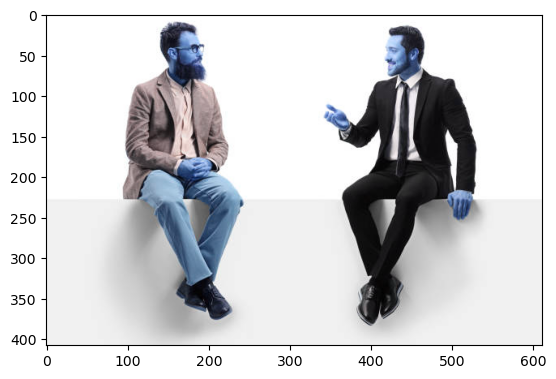

In [13]:
plt.imshow(img) ##bgr

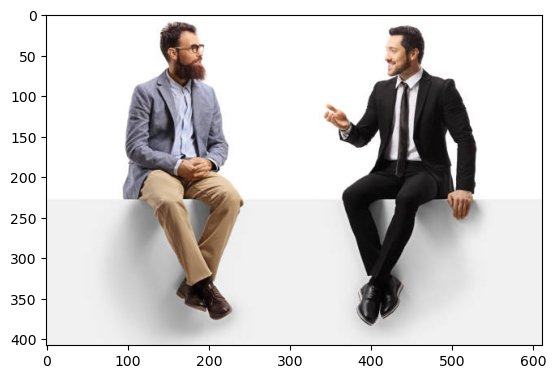

In [14]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [15]:
ClassIndex, confidece, bbox =model.detect(img,confThreshold=0.5)


In [16]:
print(ClassIndex)

[ 1  1 32 32]


In [17]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd,  conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    
    #cv2.rectangl(frame.(x,y), (x+w , y+h), (255 , 0 , 0) , 2)
    #cv2.putText(img,text, (text_offset_y), font , fontScale = font_scale , color=(0,0,0) , thickness=1)
    
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img, classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale, color=(0,255,0),thickness = 3 )

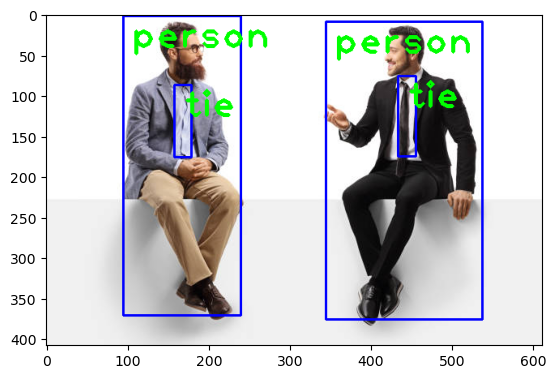

In [19]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [20]:
img = cv2.imread('street.jpg')

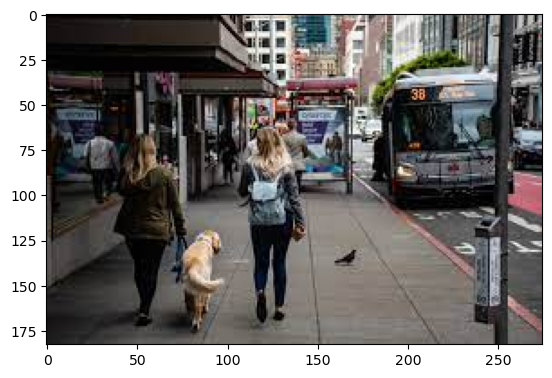

In [21]:
plt.imshow(img) ##bgr
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))


In [22]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd,  conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    
    #cv2.rectangl(frame.(x,y), (x+w , y+h), (255 , 0 , 0) , 2)
    #cv2.putText(img,text, (text_offset_y), font , fontScale = font_scale , color=(0,0,0) , thickness=1)
    
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img, classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale, color=(0,255,0),thickness = 3 )

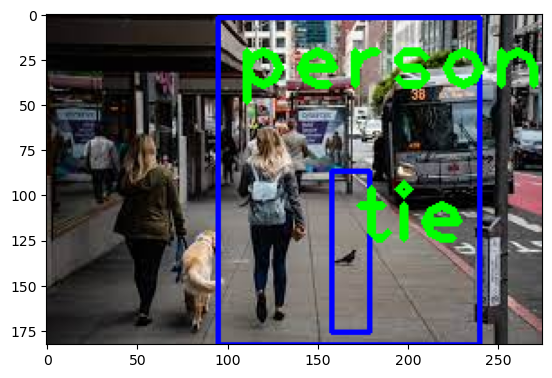

In [23]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [24]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd,  conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    
    #cv2.rectangl(frame.(x,y), (x+w , y+h), (255 , 0 , 0) , 2)
    #cv2.putText(img,text, (text_offset_y), font , fontScale = font_scale , color=(0,0,0) , thickness=1)
    
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img, classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale, color=(0,25,0),thickness = 3 )

#video Demo

In [ ]:
cap = cv2.VideoCapture("The Evening Streets of New York, USA - 4K City Walking Tour with City Sounds - YouTube - Google Chrome 2023-04-28 10-50-24.mp4")

#check if the video is opened correctly

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError(" Cannot open the video ")

    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame= cap.read()
    
    ClassIndex , confidece , bbox = model.detect(frame,confThreshold = 0.55)
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten() , confidece.flatten() , bbox):
            if(ClassInd<=80):
                cv2.rectangle(img,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10, boxes[1]+40), font , fontScale=font_scale , color = (0,255, 0),thickness = 3)

    cv2.imshow('Object Detection  for Video', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

                

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


In [ ]:
cap = cv2.VideoCapture(1)
#check if the video is opened correctly

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError(" Cannot open the webcam ")

    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame= cap.read()
    
    ClassIndex , confidece , bbox = model.detect(frame,confThreshold = 0.55)
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten() , confidece.flatten() , bbox):
            if(ClassInd<=80):
                cv2.rectangle(img,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10, boxes[1]+40), font , fontScale=font_scale , color = (0,255, 0),thickness = 3)

    cv2.imshow('Object Detection  for Video', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd,  conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    
    #cv2.rectangl(frame.(x,y), (x+w , y+h), (255 , 0 , 0) , 2)
    #cv2.putText(img,text, (text_offset_y), font , fontScale = font_scale , color=(0,0,0) , thickness=1)
    
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img, classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale, color=(0,255,0),thickness = 3 )
img = cv2.imread('street.jpg')
plt.imshow(img) ##bgr
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))


[ 3  6  1  3 10  3  3  1 10  1 10  1  3]


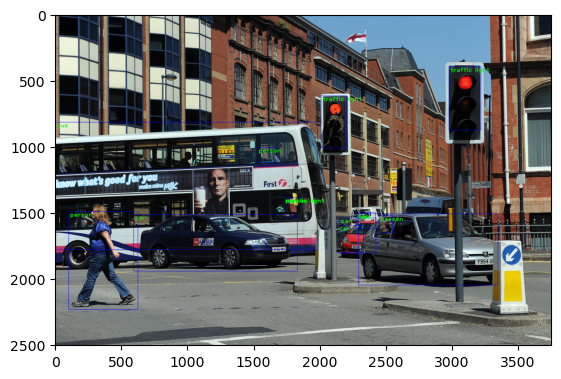

In [46]:
img = cv2.imread('pic 4.jpg')
plt.imshow(img)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
ClassIndex, confidece, bbox =model.detect(img,confThreshold=0.5)
print(ClassIndex)
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd,  conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    
    #cv2.rectangl(frame.(x,y), (x+w , y+h), (255 , 0 , 0) , 2)
    #cv2.putText(img,text, (text_offset_y), font , fontScale = font_scale , color=(0,0,0) , thickness=1)
    
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img, classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale, color=(0,255,0),thickness = 3 )


    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
img = cv2.imread('pic5.jpg')
plt.imshow(img)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
ClassIndex, confidece, bbox =model.detect(img,confThreshold=0.5)
print(ClassIndex)
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd,  conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    
    #cv2.rectangl(frame.(x,y), (x+w , y+h), (255 , 0 , 0) , 2)
    #cv2.putText(img,text, (text_offset_y), font , fontScale = font_scale , color=(0,0,0) , thickness=1)
    
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img, classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale, color=(0,255,0),thickness = 3 )


    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [51]:
cap = cv2.VideoCapture("Nonfarm Animal Caretaker Career Video - YouTube - Google Chrome 2023-04-28 13-23-14.mp4")
#check if the video is opened correctly

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError(" Cannot open the video ")

    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame= cap.read()
    
    ClassIndex , confidece , bbox = model.detect(frame,confThreshold = 0.55)
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten() , confidece.flatten() , bbox):
            if(ClassInd<=80):
                cv2.rectangle(img,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10, boxes[1]+40), font , fontScale=font_scale , color = (0,255, 0),thickness = 3)

    cv2.imshow('Object Detection  for Video', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
[23]
[23]
[23]
()
[23]
()
[18]
[17]
()
[17]
[17 18]
[17]
[ 1 18 17]
[ 1 18 17]
[ 1 18 17]
[ 1 18 17]
[ 1 17 18]
[ 1 18 17]
[ 1 18 17]
[ 1 17]
[17  1]
[17  1]
[17  1]
[ 1 17 18  1]
[ 1 17]
[ 1 17 18]
[ 1 17]
[ 1 17]
[ 1 17 18]
[ 1 17]
[ 1 18]
[ 1 18 17]
[ 1 18 17]
[ 1 18 17]
[18  1 17]
[18  1 17]
[18  1 17]
[18  1 17]
[17 18  1]
[17 18  1]
[18  1 17]
[18  1 17]
[18  1]
[18  1]
[18  1]
[18  1]
[ 1 17 18]
[ 1 17 18]
[ 1 17 18]
[ 1 17 18]
[17  1]
[17  1 18]
[17  1 18]
[ 1 17 18]
[ 1 18 17  1]
[ 1 18 17  1]
[ 1 18 17]
[ 1 18 17]
[ 1 18 17]
[18  1]
[18  1]
[18  1]
[18  1]
[18  1]
[18  1]
[18  1  1]
[18  1  1]
[ 1 18]
[ 1 18]
[18  1]
[18  1]
[18  1]
[18  1  1]
[18  1]
[18  1]
[18  1]
[18  1  1]
[18  1]
[ 1 18]
[18  1]
[18  1]
[18  1]
[18  1 32]
[18  1 32]
[18  1 32]
[18  1 32]
[18  1 32]
[18  1]
[18  1]
[18  1]
[18  1]
[ 1 41]
[1]
[ 1 41]
[1]
[1]
[1]
[ 1 41]
[ 1 41]
[1]
[ 1 41]
[1]
[1]
[1]
[1]
[ 1 

[ 1  1 65  3 18  1]
[ 1  1 65  3 18  1 18]
[ 1 65  1  3]
[ 1 65  1  3]
[ 1  1 65  3]
[ 1 65  1  3 18 18]
[ 1 65  1 18  3 65 18]
[ 1  1  3 65 18]
[1 1 3]
[1 1 3]
[1 3 1]
[1 1 3]
[1 1 3]
[1 1 3]
[ 1  3  1 18]
[1 3 1]
[1 3 1]
[1 1 3]
[1 3 1]
[1 1 3]
[1 3 1]
[1 3 1]
[1 3 1]
[1 3 1]
[1 3 1]
[1 1 3]
[1 1 3]
[1 1 3]
[1 1 3]
[1 1 3]
[1 1 3]
[1 1 3]
[1 1 3]
[1 1 3]
[1 1 3]
[1 1 3]
[1 1 3]
[1 1 3]
[1 1 3]
[1 1 3]
[1 1 3]
[1 1 3]
[1 1 3]
[1 1 3]
[1 1 3]
[1 1 3]
[1 1 3]
[17]
[17]


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
